In [3]:
library(fpp2)

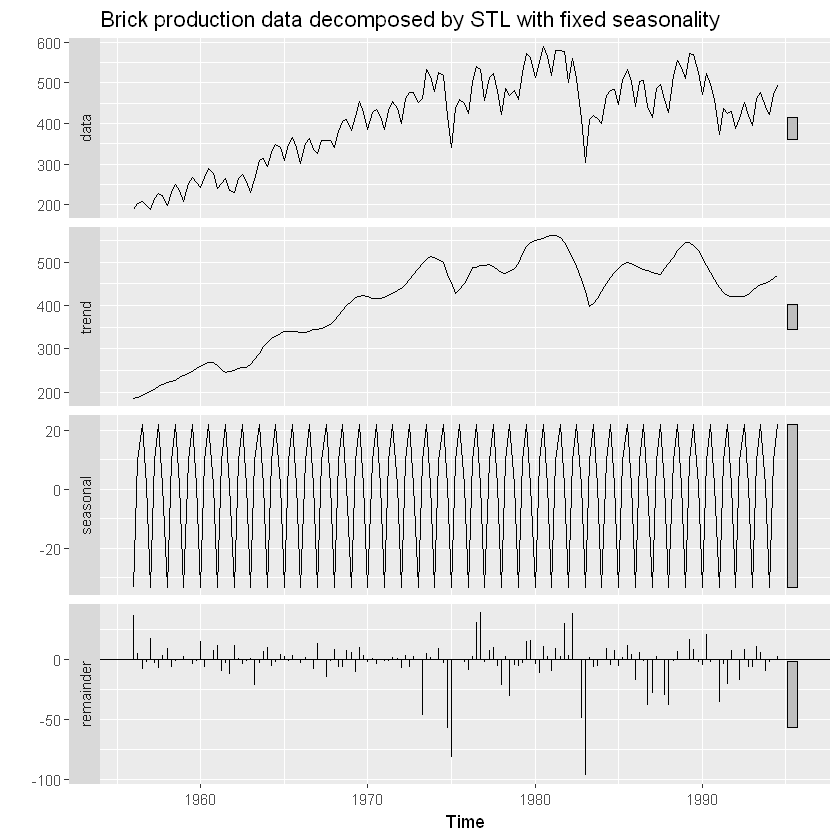

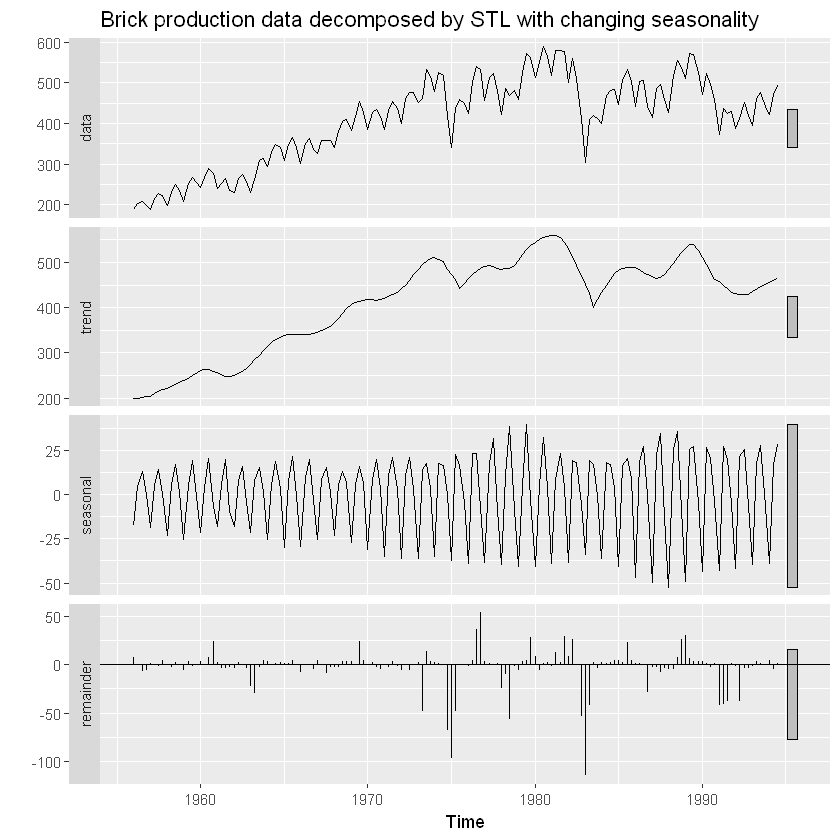

In [4]:
# 추세-주기와 계절성 지수를 계산하기 위해 STL 분해를 사용해봅시다. (고정된 계절성이나 변하는 계절성에 대해서 해봅시다.)
# a. Use an STL decomposition to calculate the trend-cycle and seasonal indices. (Experiment with having fixed or changing seasonality.)
# STL decomposition with fixed seasonality
stl_brick_fixed_st <- stl(bricksq, 
                          s.window = "periodic",
                          robust = TRUE)
# STL decomposition with changing seasonality
stl_brick_changing_st <- stl(bricksq,
                             s.window = 5,
                             robust = TRUE)
# plot decomposed data
autoplot(stl_brick_fixed_st) +
  ggtitle("Brick production data decomposed by STL with fixed seasonality")
autoplot(stl_brick_changing_st) +
  ggtitle("Brick production data decomposed by STL with changing seasonality")
# can see changing seasonal component and smaller remainders.

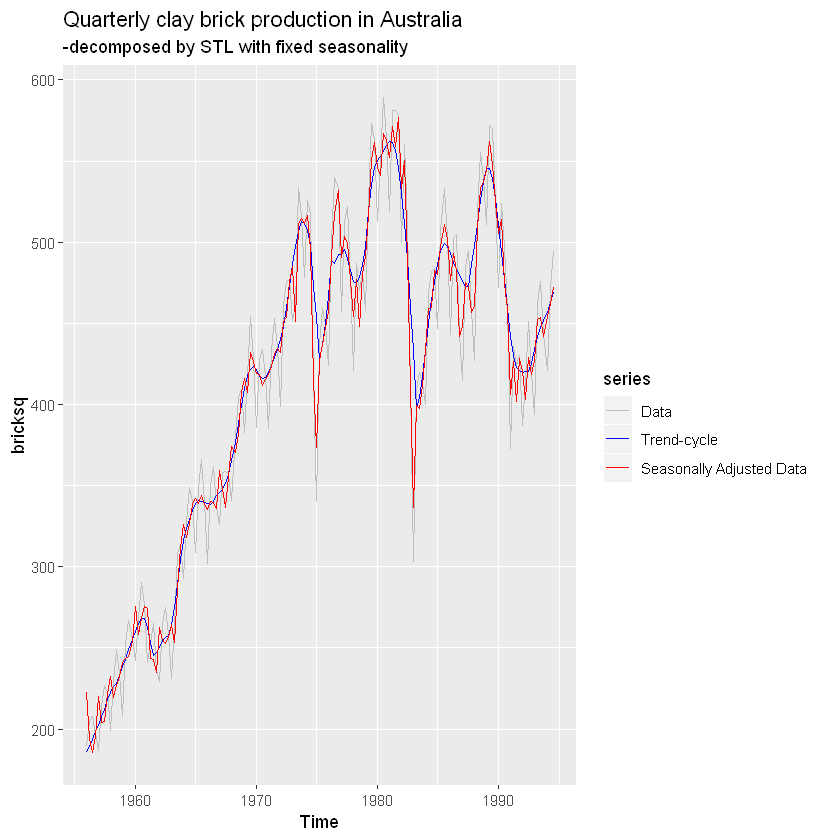

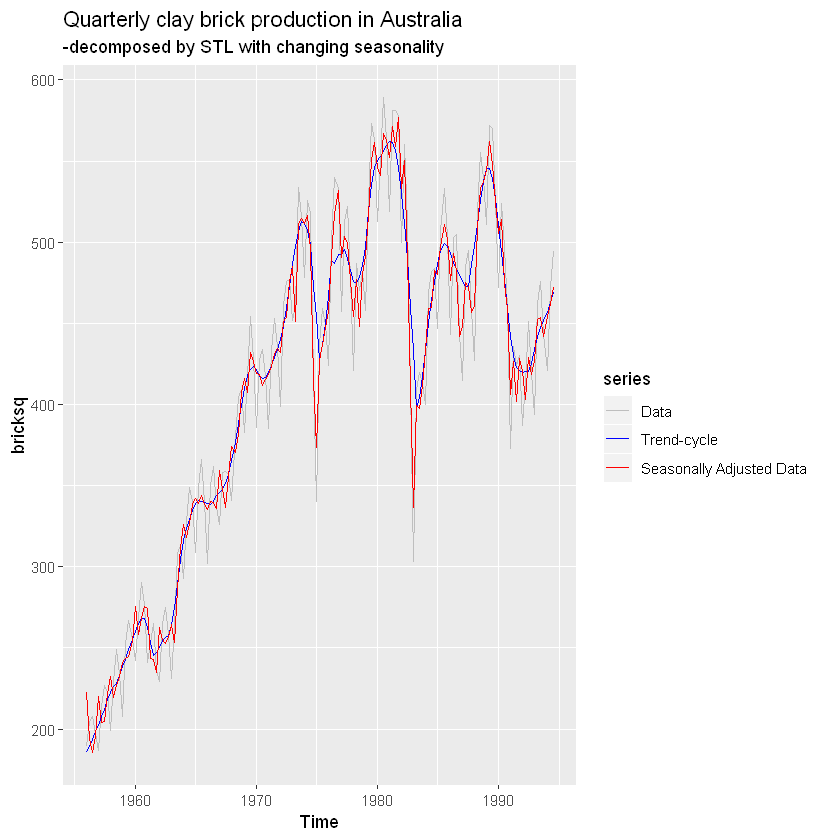

In [5]:
# b. Compute and plot the seasonally adjusted data.
# plot data which are decomposed by STL with fixed seasonality
autoplot(bricksq, series = "Data") +
  autolayer(trendcycle(stl_brick_fixed_st),
            series = "Trend-cycle") +
  autolayer(seasadj(stl_brick_fixed_st),
            series = "Seasonally Adjusted Data") +
  ggtitle("Quarterly clay brick production in Australia",
          subtitle = "-decomposed by STL with fixed seasonality") +
  scale_color_manual(values = c("gray", "red", "blue"),
                     breaks = c("Data", "Trend-cycle", "Seasonally Adjusted Data"))
# plot data which are decomposed by STL with changing seasonality
autoplot(bricksq, series = "Data") +
  autolayer(trendcycle(stl_brick_fixed_st),
            series = "Trend-cycle") +
  autolayer(seasadj(stl_brick_fixed_st),
            series = "Seasonally Adjusted Data") +
  ggtitle("Quarterly clay brick production in Australia",
          subtitle = "-decomposed by STL with changing seasonality") +
  scale_color_manual(values = c("gray", "red", "blue"),
                     breaks = c("Data", "Trend-cycle", "Seasonally Adjusted Data"))

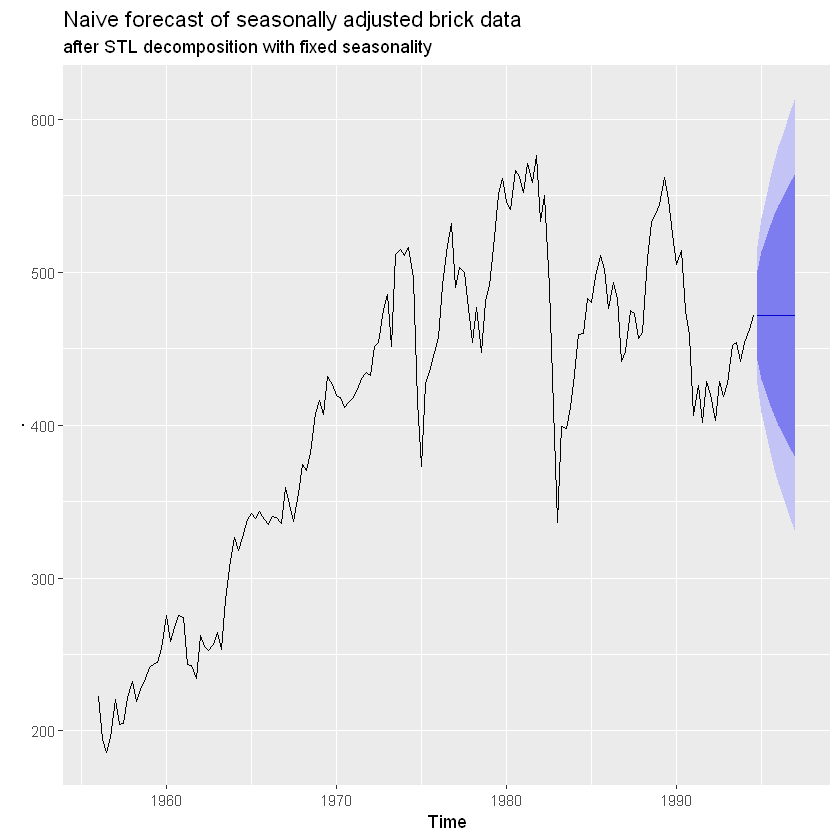

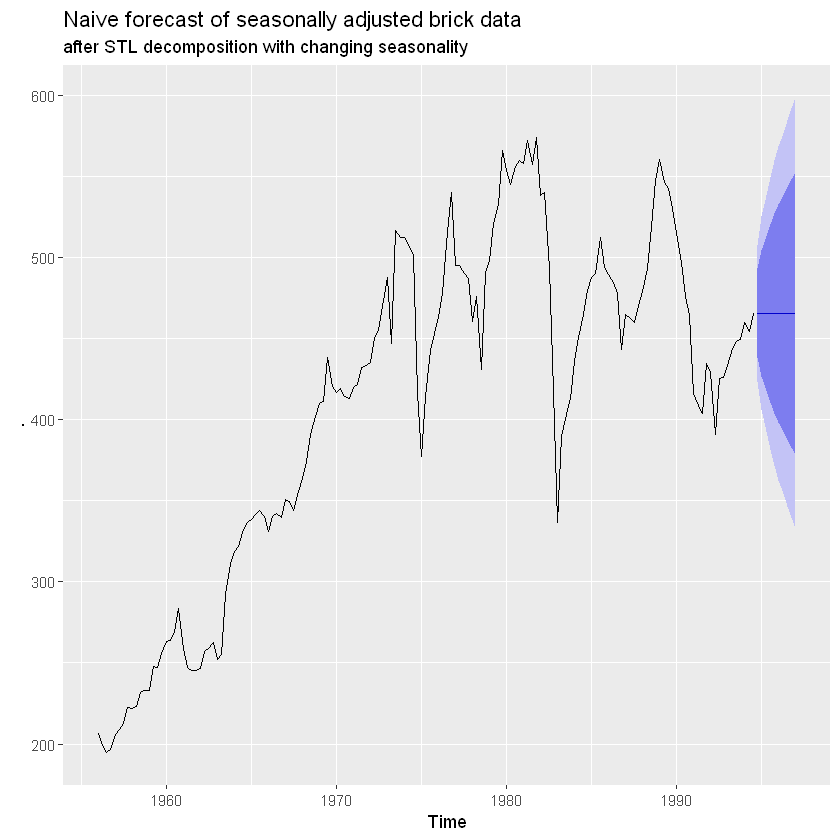

In [6]:
# c. Use a naïve method to produce forecasts of the seasonally adjusted data.
stl_brick_fixed_st %>% seasadj() %>% naive() %>% autoplot() + 
  ggtitle(label = "Naive forecast of seasonally adjusted brick data",
          subtitle = "after STL decomposition with fixed seasonality")
stl_brick_changing_st %>% seasadj() %>% naive() %>% autoplot() + 
  ggtitle(label = "Naive forecast of seasonally adjusted brick data",
          subtitle = "after STL decomposition with changing seasonality")
# can see that the prediction intervals of seasonally adjusted data decomposed by STL with changing seasonality have smaller range than the one with fixed seasonality. It happened because the variance of the remainder component decreased when the seasonality can be changed.


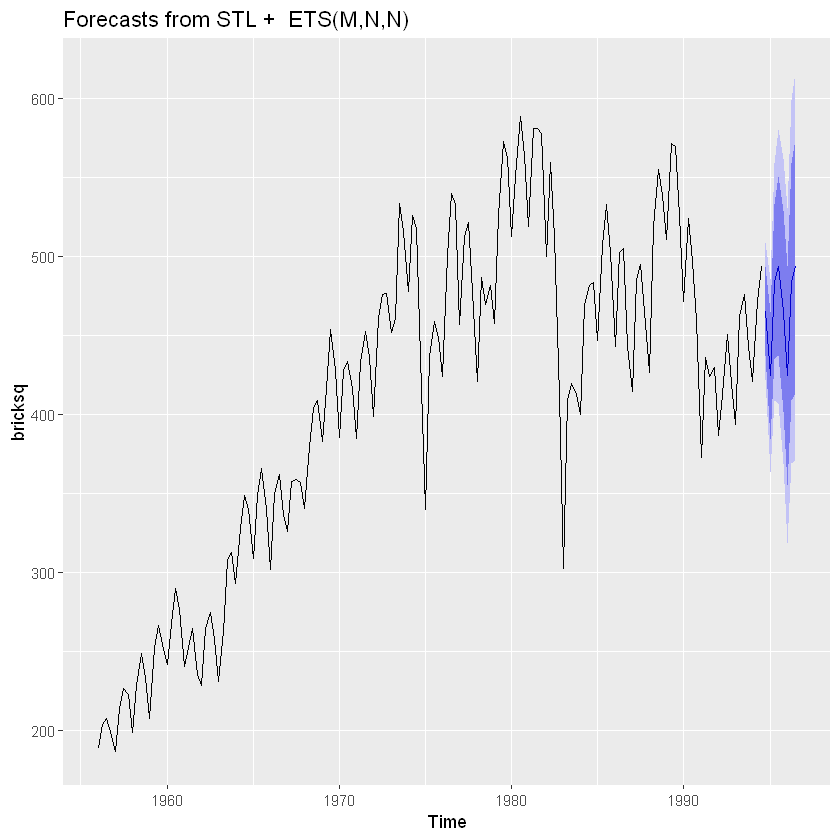

In [7]:
# d. Use stlf to reseasonalize the results, giving forecasts for the original data.
stlf_brick <- stlf(bricksq)
autoplot(stlf_brick)

Warning message in checkresiduals(stlf_brick):
"The fitted degrees of freedom is based on the model used for the seasonally adjusted data."


	Ljung-Box test

data:  Residuals from STL +  ETS(M,N,N)
Q* = 41.128, df = 6, p-value = 2.733e-07

Model df: 2.   Total lags used: 8



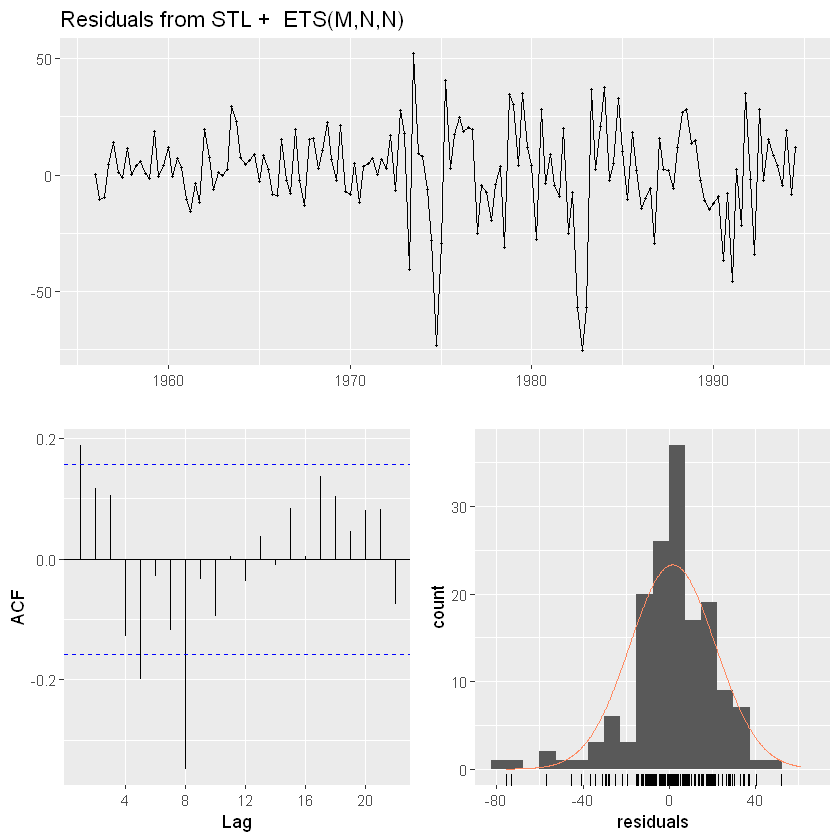

In [9]:
# e. Do the residuals look uncorrelated?
checkresiduals(stlf_brick)
# The residuals are correlated with each other.

Warning message in checkresiduals(stlf_brick_robust):
"The fitted degrees of freedom is based on the model used for the seasonally adjusted data."

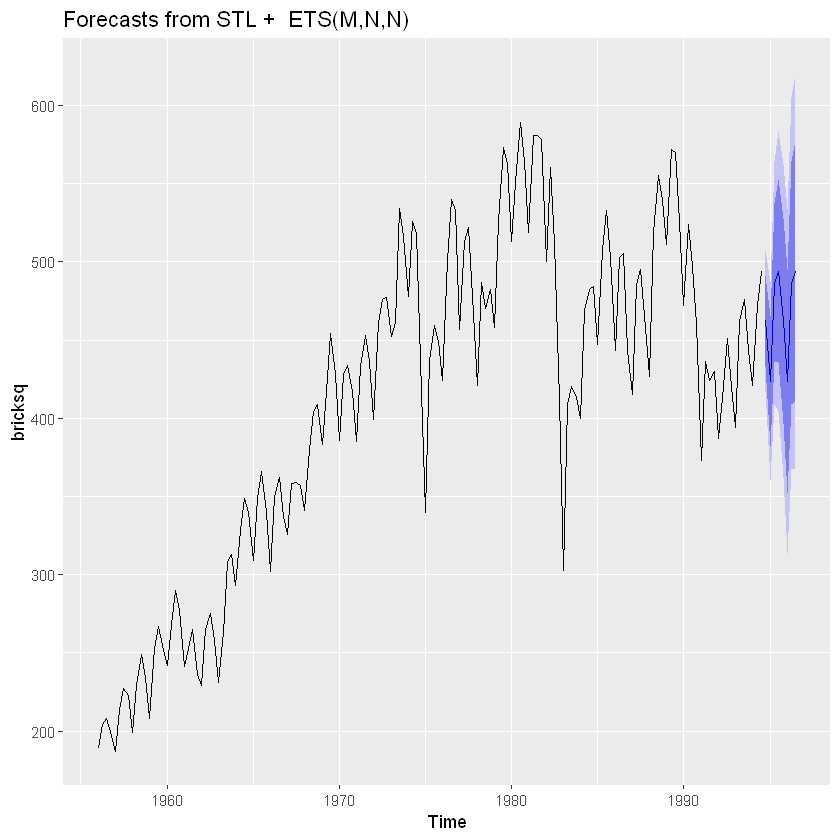


	Ljung-Box test

data:  Residuals from STL +  ETS(M,N,N)
Q* = 28.163, df = 6, p-value = 8.755e-05

Model df: 2.   Total lags used: 8



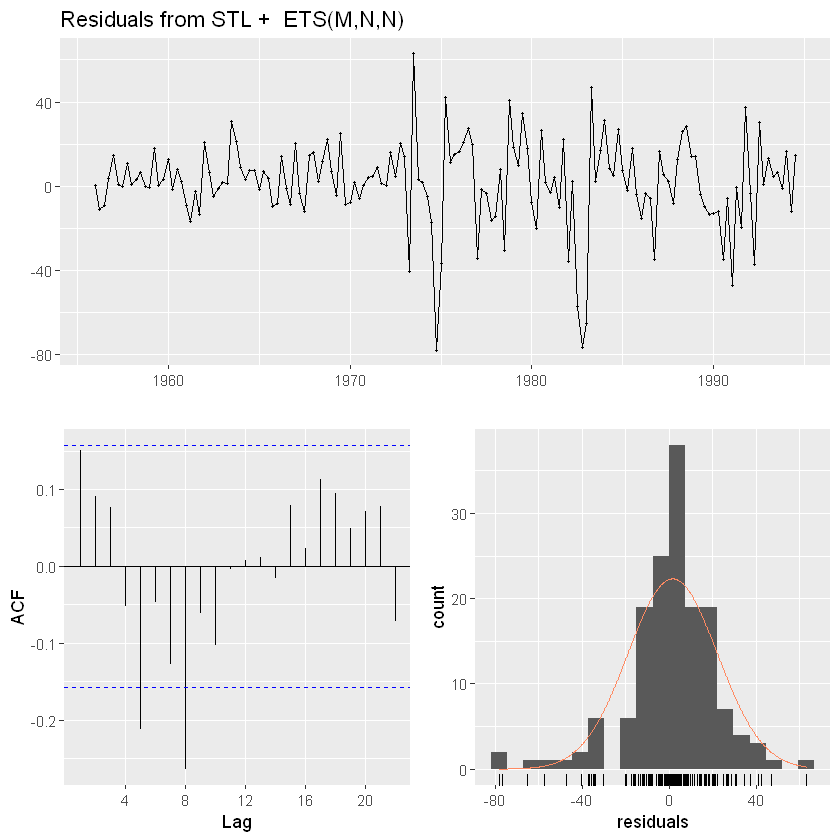

In [10]:
# f. Repeat with a robust STL decomposition. Does it make much difference?
stlf_brick_robust <- stlf(bricksq, robust = TRUE)
autoplot(stlf_brick_robust)
checkresiduals(stlf_brick_robust)
# It looked like the autocorrelations became lower generally, but there are still some high values left.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Removed 136 rows containing missing values (geom_path)."

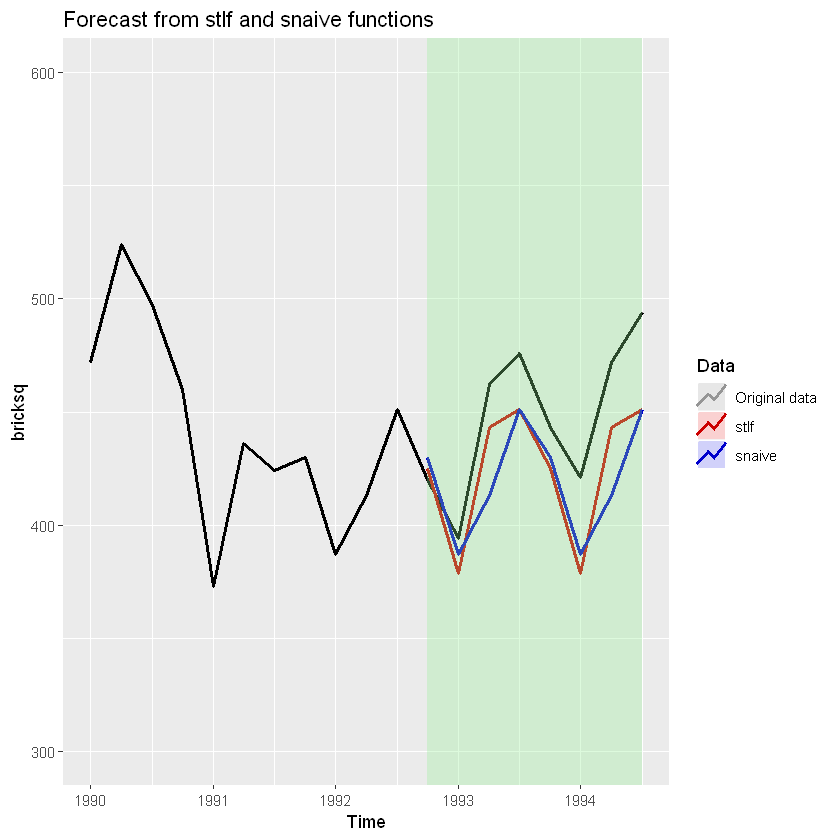

In [22]:
# g. Compare forecasts from stlf with those from snaive, using a test set comprising the last 2 years of data. Which is better?
trainset_brick <- subset(bricksq, 
                        end = length(bricksq) - 8)
testset_brick <- subset(bricksq,
                        start = length(bricksq) - 7)
snaive_brick <- snaive(trainset_brick)
stlf_brick_part <- stlf(trainset_brick, robust = TRUE)
# plot data and forecast results
autoplot(bricksq, series = "Original data") +
  geom_line(size = 1) +
  autolayer(stlf_brick_part, PI = FALSE, size = 1,
            series = "stlf") +
  autolayer(snaive_brick, PI = FALSE, size = 1,
            series = "snaive") +
  scale_color_manual(values = c("gray50", "blue", "red"),
                     breaks = c("Original data", "stlf", "snaive")) +
  scale_x_continuous(limits = c(1990, 1994.5)) +
  scale_y_continuous(limits = c(300, 600)) +
  guides(colour = guide_legend(title = "Data")) +
  ggtitle("Forecast from stlf and snaive functions") +
  annotate(
    "rect",
    xmin=1992.75,xmax=1994.5,ymin=-Inf,ymax=Inf,
    fill="lightgreen",alpha = 0.3
    )
# can see from the plot that the forecasts from stlf function are more similar to the original data than the forecasts from snaive function. Unlike snaive function, stlf function can also use trend, and its seasonality can change over time. The test set have trend with seasonality. Therefore stlf function was better than snaive function to predict brick production amount of near future.